In [63]:
%%writefile requirements.txt
backtrader==1.9.76.123
matplotlib==3.6.3
numpy==1.24.1
pandas==1.5.3
pytz==2022.7.1
scikit-learn==1.2.0
scipy==1.10.0
seaborn==0.12.2
statsmodels==0.13.5


Overwriting requirements.txt


In [64]:
!pip install -r requirements.txt --user

In [65]:
pip install YahooFinance

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
from functools import reduce
import os
import glob

In [68]:
data_to_download = dict()

In [69]:
data_to_download['energy'] = ['XOM', 'CVX', 'SHEL', 'COP', 'TTE', 'EQNR', 'BP', 'PBR-A', 'PBR', 'ENB', 'EOG', 'OXY', 'CNQ', 'EPD', 'PXD', 'SLB', 'MPC', 'TRP', 'DVN', 'VLO']
data_to_download['financials'] = ['BRK-B', 'BRK-A', 'V', 'JPM', 'MA', 'BAC', 'WFC', 'MS', 'SCHW', 'RY', 'SPGI', 'HSBC', 'TD', 'BX', 'AXP', 'GS', 'PYPL', 'HDB', 'BLK', 'C']
data_to_download['materials'] = ['LIN', 'BHP', 'RIO', 'NTR', 'SHW', 'VALE', 'APD', 'ECL', 'CTVA', 'FCX', 'SCCO', 'NUE', 'DOW', 'ALB', 'NEM', 'FNV', 'PPG', 'IFF', 'SQM', 'DD']
data_to_download['comms'] = ['GOOG', 'GOOGL', 'META', 'DIS', 'TMUS', 'VZ', 'CMCSA', 'T', 'NFLX', 'CHTR', 'ATVI', 'NTES', 'AMX', 'RELX', 'BIDU', 'BCE', 'EA', 'VOD', 'TU']
data_to_download['conscycl'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'MCD', 'NKE', 'LOW', 'SBUX', 'JD', 'PDD', 'TJX', 'ABNB', 'BKNG', 'F', 'GM', 'MAR', 'CMG', 'MELI', 'ORLY']
data_to_download['consdef'] = ['WMT', 'PG', 'KO', 'PEP', 'COST', 'PM', 'UL', 'DEO', 'BTI', 'EL', 'BUD', 'MDLZ', 'MO', 'TGT', 'CL', 'DG', 'KDP', 'ADM', 'MNST', 'STZ']
data_to_download['health'] = ['UNH', 'JNJ', 'LLY', 'PFE', 'ABBV', 'TMO', 'MRK', 'DHR', 'NVS', 'AZN', 'ABT', 'NVO', 'BMY', 'CVS', 'AMGN', 'ELV', 'MDT', 'SNY', 'CI', 'SYK']
data_to_download['industrials'] = ['UPS', 'UNP', 'RTX', 'HON', 'LMT', 'DE', 'ADP', 'CAT', 'BA', 'CP', 'CNI', 'GE', 'NOC', 'WM', 'CSX', 'MMM', 'ITW', 'GD', 'NSC', 'ETN']
data_to_download['realestate'] = ['AMT', 'PLD', 'CCI', 'PSA', 'EQIX', 'O', 'SBAC', 'WELL', 'DLR', 'SPG', 'VICI', 'CSGP', 'AVB', 'EQR', 'EXR', 'CBRE', 'ARE', 'WY', 'INVH']
data_to_download['tech'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'ORCL', 'ASML', 'CSCO', 'ACN', 'ADBE', 'CRM', 'TXN', 'QCOM', 'AMD', 'INTC', 'INTU', 'IBM', 'SAP', 'SONY', 'NOW']
data_to_download['utilities'] = ['NEE', 'SO', 'DUK', 'D', 'SRE', 'AEP', 'EXC', 'NGG', 'XEL', 'ED', 'PEG', 'WEC', 'PCGU', 'ES', 'PCG', 'AWK', 'FTS', 'BIP', 'EIX', 'FE']

In [70]:
start_date = '2015-01-01'
end_date = '2023-01-01'

In [129]:
def get_data_all(stock_dict, start_date, end_date):
    df_list = []
    for industry, stocks in stock_dict.items():
        for stock in stocks:
            data = yf.download(stock, start=start_date, end=end_date)
            data['Returns'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
            data.reset_index(inplace=True)
            newpath = 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data/' + industry
            if not os.path.exists(newpath):
                os.makedirs(newpath)
            data.to_csv(f"{newpath}/{industry} - {stock}.csv")

In [130]:
get_data_all(data_to_download, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [71]:
# def get_data(industry, stock_name, start_date, end_date):
#     data = yf.download(stock_name, start=start_date, end=end_date)
#     data['Returns'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
#     data.reset_index(inplace=True)
#     newpath = 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data/' + industry
#     if not os.path.exists(newpath):
#         os.makedirs(newpath)
#     data[['Date', 'Returns']].to_csv(f"{newpath}/{industry} - {stock_name}.csv")
    

In [72]:
# for industry, stocks in data_to_download.items():
#     for stock in stocks:
#         get_data(industry, stock, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [3]:
dirs = glob.glob("C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data/*", recursive = True)
dirs

['C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data\\comms',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data\\conscycl',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data\\consdef',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data\\energy',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data\\financials',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data\\health',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data\\industrials',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data\\materials',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data\\reale

In [4]:
'''Set up constants'''
start_train = '2015-01-05'
end_train = '2020-12-31'

start_test = '2021-01-01'
end_test = '2022-12-30'

In [5]:
from datetime import datetime

In [6]:
def get_files(path: str, extension: str):
    files = glob.glob(path + f"/*{extension}")
    return {os.path.basename(path) + '-' + os.path.basename(file):file for file in files}

def parse_date(date: str) -> datetime:
  return datetime.strptime(date, '%Y-%m-%d')

def get_dataframe(start_train, end_train, start_test, end_test, paths):
    df_list = []
    for path in paths:
        paths_dict = get_files(path, extension = '.csv')
        for symbol, file_path in paths_dict.items():
            df = pd.read_csv(file_path, parse_dates = ['Date'])
#             print(file_path)
#             print(df)
            if df.shape[0] == 0:
                continue
            df['Date'] = df['Date'].apply(lambda x: x.replace(tzinfo = None))
            if df['Date'].iloc[0] > parse_date(start_train) or df['Date'].iloc[-1] < parse_date(end_test):
                print(symbol)
                continue
            else:
                df = df.set_index('Date', drop = True)
#                 df[symbol] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))
                df[symbol] = df['Returns']
                log_returns = df[symbol][start_train:end_train]
                log_returns.dropna(inplace = True)
                df_list.append(log_returns)

    return df_list

In [7]:
df_list = get_dataframe(start_train, end_train, start_test, end_test, dirs)

conscycl-conscycl - ABNB.csv
conscycl-conscycl - PDD.csv
financials-financials - PYPL.csv
materials-materials - CTVA.csv
materials-materials - DOW.csv
materials-materials - NTR.csv
realestate-realestate - INVH.csv
realestate-realestate - VICI.csv
utilities-utilities - PCGU.csv


In [8]:
df_list

[Date
 2015-01-05   -0.015317
 2015-01-06    0.000000
 2015-01-07    0.022203
 2015-01-08    0.021720
 2015-01-09    0.016426
                 ...   
 2020-12-24    0.009152
 2020-12-28    0.004893
 2020-12-29    0.020021
 2020-12-30    0.006812
 2020-12-31   -0.012983
 Name: comms-comms - AMX.csv, Length: 1510, dtype: float64,
 Date
 2015-01-05   -0.014007
 2015-01-06   -0.018816
 2015-01-07   -0.021796
 2015-01-08    0.009919
 2015-01-09   -0.018349
                 ...   
 2020-12-24    0.008280
 2020-12-28    0.005154
 2020-12-29   -0.000656
 2020-12-30    0.002296
 2020-12-31    0.013772
 Name: comms-comms - ATVI.csv, Length: 1510, dtype: float64,
 Date
 2015-01-05   -0.012325
 2015-01-06    0.001991
 2015-01-07    0.016656
 2015-01-08    0.006715
 2015-01-09   -0.011726
                 ...   
 2020-12-24    0.005628
 2020-12-28   -0.002576
 2020-12-29    0.000937
 2020-12-30    0.002106
 2020-12-31    0.000467
 Name: comms-comms - BCE.csv, Length: 1510, dtype: float64,
 Date
 20

In [9]:
def combine(list_of_df):
  df = pd.concat(list_of_df, axis = 1)
  df.dropna(axis = 1, thresh = int(len(df) * 0.60), inplace = True) #require that each asset have at least 75% of data
  df.fillna(method = 'ffill', axis = 0, inplace = True) #fill NAs by forward filling
  return df

df = combine(df_list)
df_T = df.T

print('Concatenated dataframe along columns: \n', df.iloc[:5, :5])
print('\nTransposed dataframe: \n', df_T.iloc[:5,:5])

Concatenated dataframe along columns: 
             comms-comms - AMX.csv  comms-comms - ATVI.csv  \
Date                                                        
2015-01-05              -0.015317               -0.014007   
2015-01-06               0.000000               -0.018816   
2015-01-07               0.022203               -0.021796   
2015-01-08               0.021720                0.009919   
2015-01-09               0.016426               -0.018349   

            comms-comms - BCE.csv  comms-comms - BIDU.csv  \
Date                                                        
2015-01-05              -0.012325               -0.014858   
2015-01-06               0.001991                0.001773   
2015-01-07               0.016656                0.018762   
2015-01-08               0.006715                0.021431   
2015-01-09              -0.011726               -0.010129   

            comms-comms - CHTR.csv  
Date                                
2015-01-05               -0.03

In [10]:
df_T.shape

(209, 1510)

In [11]:
df_T.dropna(axis = 1, inplace = True)

In [12]:
df_T.shape

(209, 1510)

## Scaling

In [13]:
import seaborn as sns
import glob
import os
import typing
import warnings
import matplotlib.pyplot as plt
#import tensorflow as tf

from itertools import combinations, chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, cluster_optics_dbscan
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import pytz
# warnings.filterwarnings("ignore")

In [14]:
def standardize(df: pd.DataFrame):
    scaler = StandardScaler()
    normalized = scaler.fit_transform(df)
    #symbols = df.index

    return normalized

normalized = standardize(df_T)
df_norm = pd.DataFrame(normalized, index = df_T.index, columns = df_T.columns)

## PCA

In [15]:
def optimize_pca(df):

    explained_variance = []
    principal_components = []

    for i in range(1,51):
        pca = PCA(n_components = i)
        pca.fit_transform(df)
        explained_variance.append(sum(pca.explained_variance_ratio_))
        principal_components.append(i)

    plt.figure(figsize = (7,4))
    plt.plot(principal_components, explained_variance, color = 'black', marker = 'o')
    plt.axvline(x=9, )
    plt.title('Explained variance against number of principal components')
    plt.xlabel('No. of Principal Components')
    plt.ylabel('Percentage of variance explained')


def final_pca(df, n):

    pca = PCA(n_components = n)
    components = pca.fit_transform(df)
    explained_variance = sum(pca.explained_variance_ratio_)
    

    pca_df = pd.DataFrame(components, columns = [f"PC{k}" for k in range(1, n+1)], index = df.index)
    print(f"Total percentage of variance explained with {n} principal components: {round(explained_variance, 3)}")
    return pca_df


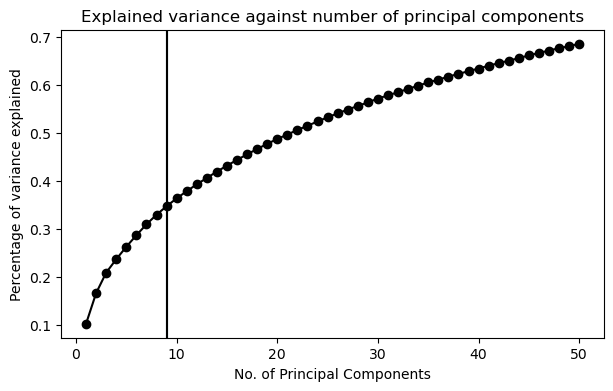

In [16]:
optimize_pca(df_norm)
plt.axvline(x=9, color = 'black')

###### From the plot, the elbow point of the curve gives 9  as the optimal number of Principal Components

In [145]:
pca_df = final_pca(df_norm, 9)

Total percentage of variance explained with 9 principal components: 0.348


In [146]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
comms-comms - AMX.csv,6.373228,-2.971993,7.041896,-5.539150,-1.338960,-0.726977,0.696556,3.890036,-1.306520
comms-comms - ATVI.csv,-4.609829,19.955583,8.016417,4.377565,-4.761242,-6.354468,4.120457,-4.120572,-0.227163
comms-comms - BCE.csv,-4.959476,-6.764600,2.776954,-0.855988,-0.075624,-4.119904,-2.076889,-3.114054,-0.417463
comms-comms - BIDU.csv,7.684947,15.850595,4.799893,-1.891981,-1.844812,-10.000341,6.467497,2.593900,-17.167715
comms-comms - CHTR.csv,-6.496376,3.134599,0.524932,-0.703454,-3.956474,-2.918620,-0.609908,1.308085,3.676976
...,...,...,...,...,...,...,...,...,...
utilities-utilities - PEG.csv,-14.063504,-13.150866,3.590327,2.481262,2.532120,2.296272,0.514919,2.924723,-2.334955
utilities-utilities - SO.csv,-16.949213,-13.021854,4.614805,2.501634,1.863557,2.746385,0.528360,1.248262,-2.317225
utilities-utilities - SRE.csv,-12.551702,-12.213503,4.668094,4.547973,1.738977,2.619106,1.502560,2.640067,-2.614723
utilities-utilities - WEC.csv,-19.385307,-12.018333,6.849081,2.984017,2.324837,2.270367,0.190406,0.545916,-2.031130


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

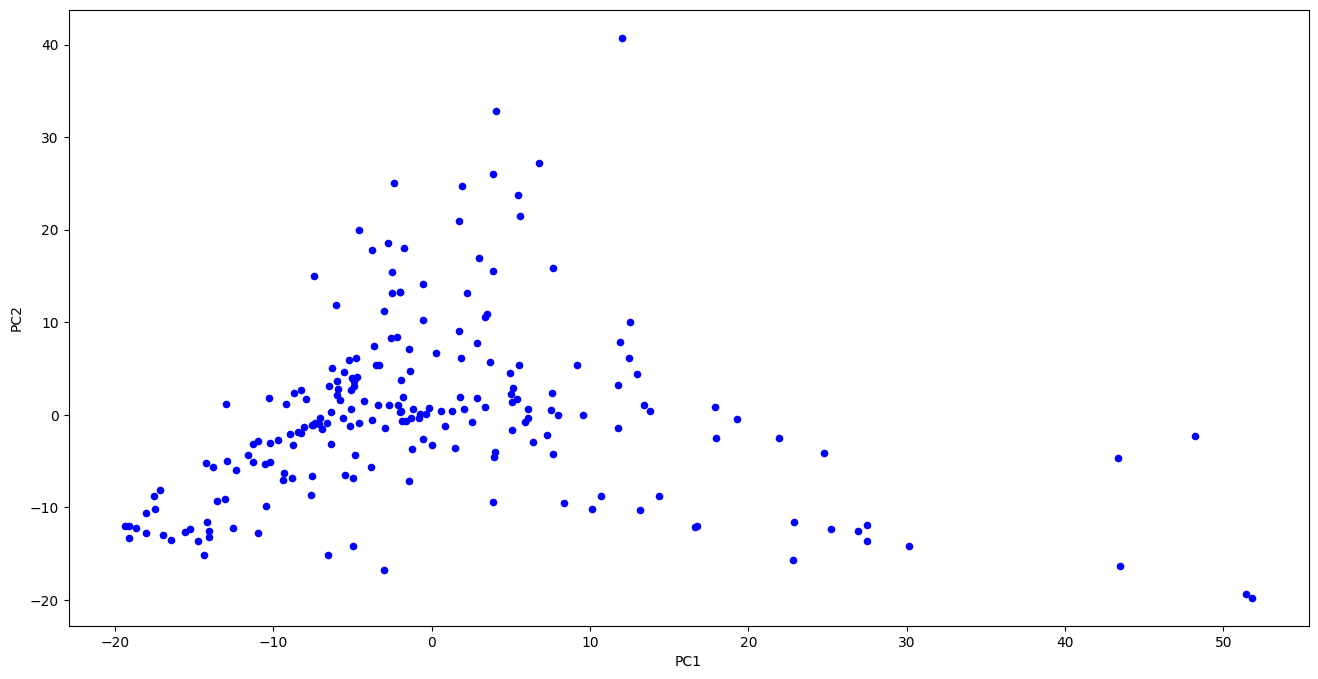

In [147]:
pca_df.plot('PC1', 'PC2', marker = 'o', color = 'blue', kind = 'scatter', figsize = (16,8))

## Clustering

In [148]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
comms-comms - AMX.csv,6.373228,-2.971993,7.041896,-5.539150,-1.338960,-0.726977,0.696556,3.890036,-1.306520
comms-comms - ATVI.csv,-4.609829,19.955583,8.016417,4.377565,-4.761242,-6.354468,4.120457,-4.120572,-0.227163
comms-comms - BCE.csv,-4.959476,-6.764600,2.776954,-0.855988,-0.075624,-4.119904,-2.076889,-3.114054,-0.417463
comms-comms - BIDU.csv,7.684947,15.850595,4.799893,-1.891981,-1.844812,-10.000341,6.467497,2.593900,-17.167715
comms-comms - CHTR.csv,-6.496376,3.134599,0.524932,-0.703454,-3.956474,-2.918620,-0.609908,1.308085,3.676976
...,...,...,...,...,...,...,...,...,...
utilities-utilities - PEG.csv,-14.063504,-13.150866,3.590327,2.481262,2.532120,2.296272,0.514919,2.924723,-2.334955
utilities-utilities - SO.csv,-16.949213,-13.021854,4.614805,2.501634,1.863557,2.746385,0.528360,1.248262,-2.317225
utilities-utilities - SRE.csv,-12.551702,-12.213503,4.668094,4.547973,1.738977,2.619106,1.502560,2.640067,-2.614723
utilities-utilities - WEC.csv,-19.385307,-12.018333,6.849081,2.984017,2.324837,2.270367,0.190406,0.545916,-2.031130


In [149]:
silhouette_scores = {}
cluster_results = {}

In [150]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 5000,
}

def Kmeans_ParameterTesting_SSE(data):
# A list holds the SSE values for each k
    sse = []
    max_k = 20
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs, random_state= 2023)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

  
    plt.figure(figsize=(7,4))
    plt.plot(np.arange(2, max_k, 1), sse, color = 'black')
    plt.xticks(np.arange(2,max_k,1))
    plt.title('Within-cluster sum of squares against k')
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.axvline(x = 9, color = 'black', linestyle = '--')


def Kmeans_ParameterTesting_silhouette(data):

    silhouette_coefficients = []
    max_k = 20
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs, random_state= 2023)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)


    plt.figure(figsize=(16,8))
    plt.plot(range(2, max_k), silhouette_coefficients)
    plt.title("Silhouette score against k")
    plt.xlabel("Number of Clusters")
    plt.xticks(np.arange(2,max_k,1))
    plt.ylabel("Silhouette Coefficient")
    plt.show()

In [151]:
import sklearn

In [152]:
pip install threadpoolctl==3.2.0

Note: you may need to restart the kernel to use updated packages.


In [153]:
sklearn.show_versions()


System:
    python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\user\anaconda3\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.2.0
          pip: 23.2.1
   setuptools: 68.2.1
        numpy: 1.24.1
        scipy: 1.10.0
       Cython: 0.29.32
       pandas: 1.5.3
   matplotlib: 3.6.3
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libopenblas
       filepath: C:\Users\user\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: Zen

       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libopenblas
       filepath: C:\Users\user\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
        version: 0.3.23.dev
threading_layer: pt

In [154]:
type(pca_df)

pandas.core.frame.DataFrame

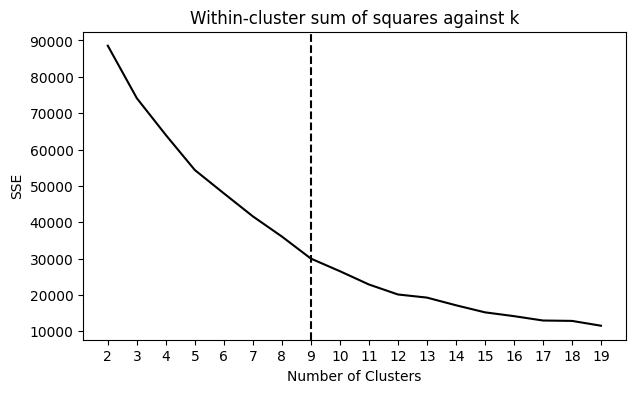

In [155]:
Kmeans_ParameterTesting_SSE(pca_df)

In [156]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
comms-comms - AMX.csv,6.373228,-2.971993,7.041896,-5.539150,-1.338960,-0.726977,0.696556,3.890036,-1.306520
comms-comms - ATVI.csv,-4.609829,19.955583,8.016417,4.377565,-4.761242,-6.354468,4.120457,-4.120572,-0.227163
comms-comms - BCE.csv,-4.959476,-6.764600,2.776954,-0.855988,-0.075624,-4.119904,-2.076889,-3.114054,-0.417463
comms-comms - BIDU.csv,7.684947,15.850595,4.799893,-1.891981,-1.844812,-10.000341,6.467497,2.593900,-17.167715
comms-comms - CHTR.csv,-6.496376,3.134599,0.524932,-0.703454,-3.956474,-2.918620,-0.609908,1.308085,3.676976
...,...,...,...,...,...,...,...,...,...
utilities-utilities - PEG.csv,-14.063504,-13.150866,3.590327,2.481262,2.532120,2.296272,0.514919,2.924723,-2.334955
utilities-utilities - SO.csv,-16.949213,-13.021854,4.614805,2.501634,1.863557,2.746385,0.528360,1.248262,-2.317225
utilities-utilities - SRE.csv,-12.551702,-12.213503,4.668094,4.547973,1.738977,2.619106,1.502560,2.640067,-2.614723
utilities-utilities - WEC.csv,-19.385307,-12.018333,6.849081,2.984017,2.324837,2.270367,0.190406,0.545916,-2.031130


In [157]:
pca_df.dropna(axis = 1, inplace = True)

<AxesSubplot: title={'center': 'K means cluster results for k = 9'}, xlabel='PC1', ylabel='PC2'>

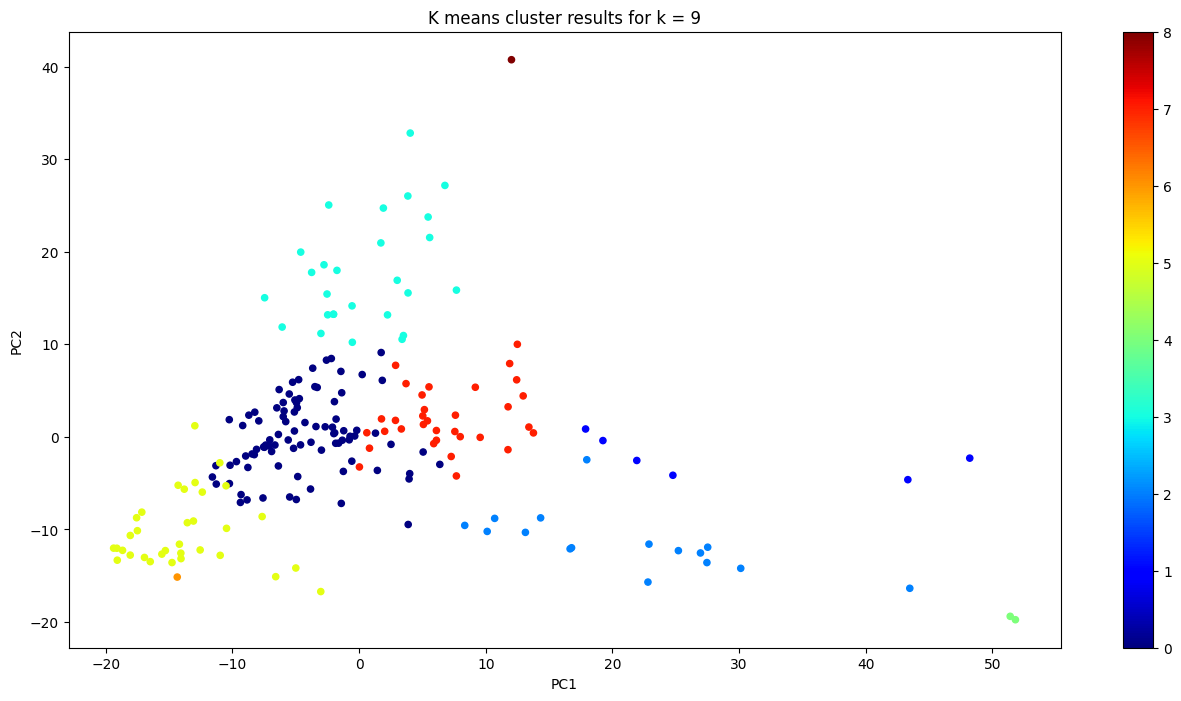

In [158]:
final_kmeans = KMeans(n_clusters = 9, **kmeans_kwargs, random_state= 2023)
final_kmeans.fit(pca_df)
#silhouette_scores['KMeans'] = silhouette_score(pca_df, final_kmeans.labels_)
cluster_results['KMeans'] = final_kmeans.predict(pca_df)

pca_df.plot('PC1', 'PC2', c = final_kmeans.labels_, kind = 'scatter', figsize = (16,8), cmap = 'jet', title = 'K means cluster results for k = 9')

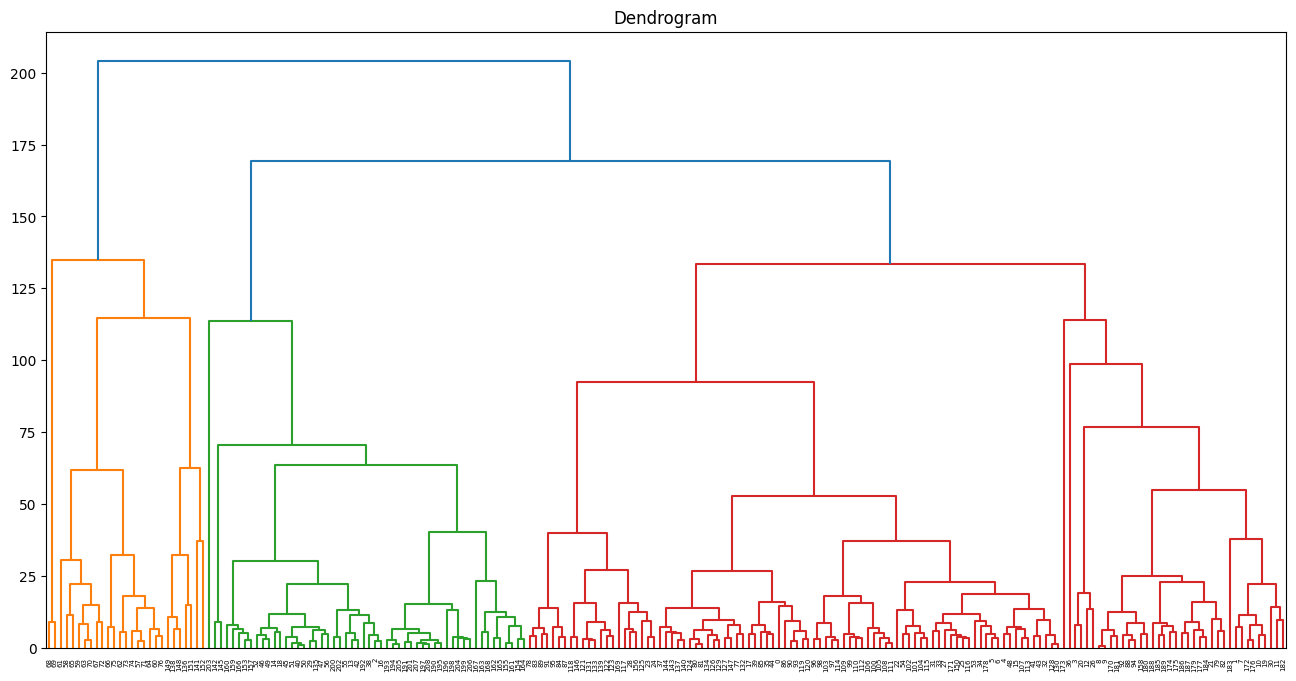

In [159]:
def draw_dendrogram(df):
  link = linkage(df, method = 'ward')

  plt.figure(figsize = (16,8))
  plt.title("Dendrogram")
  dendrogram(link, orientation = 'top', distance_sort = 'decreasing', show_leaf_counts = True)

draw_dendrogram(pca_df)

C:\Users\user\AppData\Local\Temp\ipykernel_33488\2702823021.py:6: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  pca_df.plot('PC1', 'PC2', marker = 'o', color = results, kind = 'scatter', cmap='jet', figsize = (16,8))


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

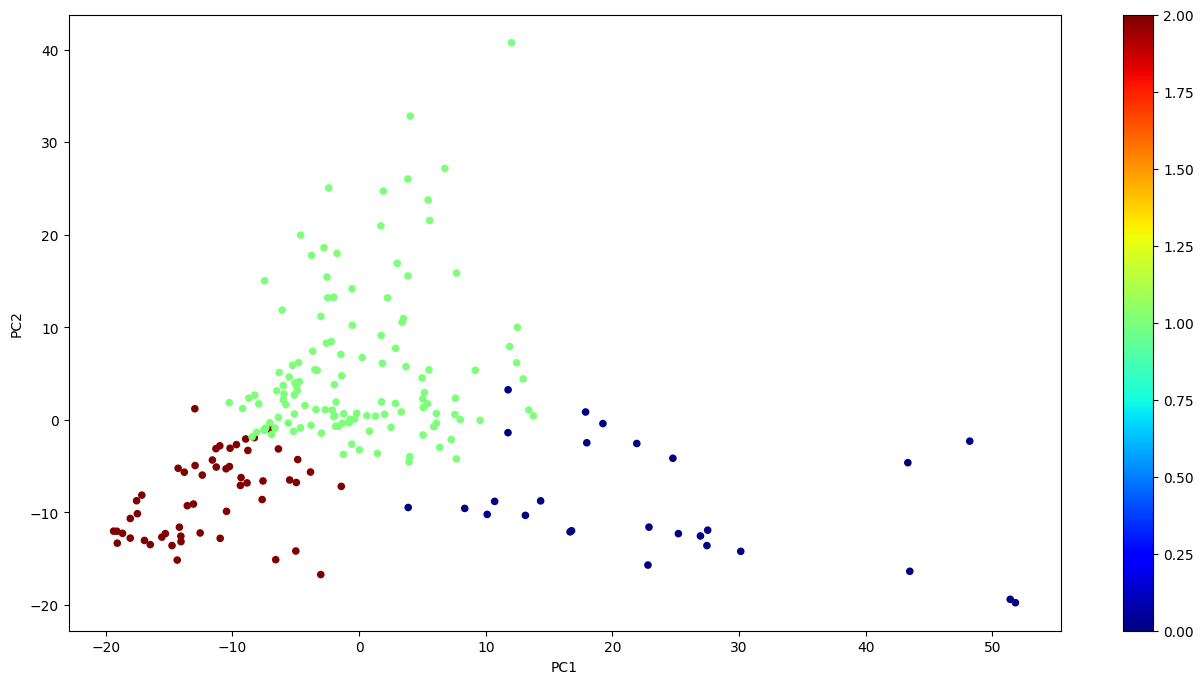

In [160]:
final_agglo = AgglomerativeClustering(n_clusters = 3)
results = final_agglo.fit_predict(pca_df)

cluster_results['Agglo'] = results

pca_df.plot('PC1', 'PC2', marker = 'o', color = results, kind = 'scatter', cmap='jet', figsize = (16,8))

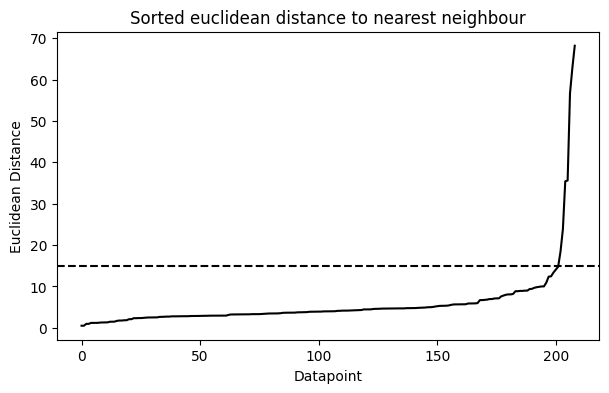

In [161]:
def optimal_epsilon(data):
  plt.figure(figsize=(7,4))
  nn = NearestNeighbors(n_neighbors=2).fit(data)
  distances, idx = nn.kneighbors(data)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.plot(distances, color = 'black')
  plt.title("Sorted euclidean distance to nearest neighbour")
  plt.xlabel("Datapoint")
  plt.ylabel("Euclidean Distance")


optimal_epsilon(pca_df)
plt.axhline(y=15, color='black', linestyle='--')

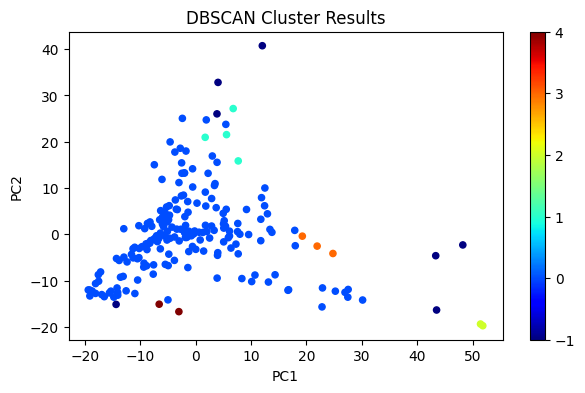

Estimated number of clusters: 5
Estimated number of noise points: 7


In [162]:
def get_dbscan(data, eps, min_samples):
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  results = dbscan.fit_predict(data)
  # Plot the cluster results.
  fig, ax = plt.subplots(figsize=(7,4))
  data.plot(x="PC1", y="PC2", kind="scatter", 
  title=f"DBSCAN Cluster Results", c=results, cmap="jet", ax=ax)
  plt.show()

  labels = dbscan.labels_
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  #print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels))

  return results, labels

#eps = 3 , min_samples = 2 as we want to identify at least a pair of securities in the cluster
dbscan_cluster, labels = get_dbscan(pca_df,15,2)

In [163]:
cluster_results['DBSCAN'] = dbscan_cluster

In [164]:
def map_clusters(cluster_result: np.array) -> typing.List[typing.List[str]]:
  grouping = [[] for _ in range(max(cluster_result) + 1)]
  for i, res in enumerate(cluster_result):
    grouping[res].append(pca_df.index[i])


  return grouping

In [165]:
groups = {}
for algorithm, cluster_result in cluster_results.items():
  groups[algorithm] = map_clusters(cluster_result)
print("Number of clusters:", {k:len(v) for k,v in groups.items()})
print('Example of cluster:', groups['KMeans'][0])

Number of clusters: {'KMeans': 9, 'Agglo': 3, 'DBSCAN': 5}
Example of cluster: ['comms-comms - AMX.csv', 'comms-comms - BCE.csv', 'comms-comms - CHTR.csv', 'comms-comms - CMCSA.csv', 'comms-comms - DIS.csv', 'comms-comms - RELX.csv', 'comms-comms - T.csv', 'comms-comms - TMUS.csv', 'comms-comms - TU.csv', 'comms-comms - VOD.csv', 'comms-comms - VZ.csv', 'conscycl-conscycl - CMG.csv', 'conscycl-conscycl - HD.csv', 'conscycl-conscycl - LOW.csv', 'conscycl-conscycl - MCD.csv', 'conscycl-conscycl - NKE.csv', 'conscycl-conscycl - ORLY.csv', 'conscycl-conscycl - SBUX.csv', 'conscycl-conscycl - TJX.csv', 'conscycl-conscycl - TM.csv', 'consdef-consdef - ADM.csv', 'consdef-consdef - BTI.csv', 'consdef-consdef - BUD.csv', 'consdef-consdef - CL.csv', 'consdef-consdef - COST.csv', 'consdef-consdef - DEO.csv', 'consdef-consdef - DG.csv', 'consdef-consdef - EL.csv', 'consdef-consdef - KDP.csv', 'consdef-consdef - KO.csv', 'consdef-consdef - MDLZ.csv', 'consdef-consdef - MNST.csv', 'consdef-consdef -

In [166]:
len(groups['DBSCAN'][0])

191

In [167]:
'''Getting all pairwise combinations within each cluster for each clustering algorithm'''

def find_pairs(algorithm: str, groups: typing.Dict[str,typing.List[typing.List[str]]]) -> pd.core.series.Series:
    total_pairs = []
    for i in range(len(groups[algorithm])):
        pairs = list(combinations(groups[algorithm][i],2))
        #pairs = list(chain.from_iterable(combos))
        total_pairs += pairs

    print(f"Found {len(total_pairs)} potential pairs")

    total_pairs = pd.Series(total_pairs)
    
    print(total_pairs)
    
    return total_pairs

In [168]:
total_pairs = find_pairs('KMeans', groups)

Found 5548 potential pairs
0          (comms-comms - AMX.csv, comms-comms - BCE.csv)
1         (comms-comms - AMX.csv, comms-comms - CHTR.csv)
2        (comms-comms - AMX.csv, comms-comms - CMCSA.csv)
3          (comms-comms - AMX.csv, comms-comms - DIS.csv)
4         (comms-comms - AMX.csv, comms-comms - RELX.csv)
                              ...                        
5543    (materials-materials - NUE.csv, realestate-rea...
5544    (materials-materials - NUE.csv, realestate-rea...
5545    (materials-materials - PPG.csv, realestate-rea...
5546    (materials-materials - PPG.csv, realestate-rea...
5547    (realestate-realestate - CBRE.csv, realestate-...
Length: 5548, dtype: object


In [169]:
def find_suitable_pairs(df: pd.DataFrame, pairs: pd.core.series.Series) -> pd.core.frame.DataFrame:
    
    # 1. Statistically significant t-stat from the Engle-Granger test (5% level)
    
    engle_granger_tests = []
    norm_spreads = []

    for pair in pairs: # Test each pair for cointegration

        security_0 = df[pair[0]]
        security_1 = df[pair[1]]
        
        # Get independent and dependent variables
        # for OLS calculation and corresponding
        # pvalue for Engle-Granger tests

        test_0 = ts.coint(security_0, security_1)
        test_1 = ts.coint(security_1, security_0)

        t_stat_0, pvalue_0 = test_0[0], test_0[1]
        t_stat_1, pvalue_1 = test_1[0], test_1[1]

        # Choose smallest t-stat for Engle-Granger Test
        if abs(t_stat_0) < abs(t_stat_1):
            pvalue = pvalue_0
            x = sm.add_constant(np.asarray(security_1))
            y = np.asarray(security_0)
        else:
            pvalue = pvalue_1
            x = sm.add_constant(np.asarray(security_0))
            y = np.asarray(security_1)

        engle_granger_tests.append(pvalue)

        # Get parameters and calculate spread
        model = sm.OLS(y, x)
        result = model.fit()
        alpha, beta = result.params[0], result.params[1]

        spread = y - (alpha + beta*x.T[1])
        norm_spread = (spread - np.mean(spread))/np.std(spread)
        norm_spreads.append(norm_spread)

    # Convert spreads from list to dataframe
    norm_spreads = pd.DataFrame(np.transpose(norm_spreads),
                                index=df.index)

    engle_granger_tests = pd.Series(engle_granger_tests)


    
    # 2.Hurst exponent < 0.5

    hurst_exponents = []

    for col in norm_spreads.columns:

            # Create the range of lag values
            lags = range(2, 100)

            # Calculate the array of the variances of the lagged differences
            diffs = [np.subtract(norm_spreads[col].values[l:], norm_spreads[col].values[:-l]) for l in lags]
            tau = [np.sqrt(np.std(diff)) for diff in diffs]

            # Use a linear fit to estimate the Hurst Exponent
            poly = np.polyfit(np.log(lags), np.log(tau), 1)

            # Get the Hurst exponent from the polyfit output
            hurst_exponents.append(poly[0]*2.0)

    hurst_exponents = pd.Series(hurst_exponents)


    
    # 3. Half-life between [1, 252]
    
    lag = norm_spreads.shift(1)
    lag.loc[lag.index[0]] = lag.loc[lag.index[1]]

    ret = norm_spreads - lag
    lag = sm.add_constant(lag)

    model = sm.OLS(ret, lag)
    result = model.fit()
    half_lives = -np.log(2)/result.params.iloc[1]


    
    # 4. Spread must cross the mean on average 12x per year

    mean = 0
    curr_period = norm_spreads
    next_period = norm_spreads.shift(-1)
    count = (
        ((curr_period >= mean) & (next_period < mean)) |  # Over to under
        ((curr_period < mean) & (next_period >= mean)) |  # Under to over
        (curr_period == mean)
        ).sum()
    trading_year = 252
    avg_cross_count = count/(len(df)/trading_year)

    
    
    # Filtering Pairs

    max_pvalue = 0.05
    max_hurst_exp = 0.5
    max_half_life = 252.0
    min_half_life = 1.0
    min_avg_cross = 12.0

    # Generate summary dataframe of potential trading pairs
    pairs_df = pd.concat([pairs,
                          engle_granger_tests,
                          hurst_exponents,
                          half_lives,
                          avg_cross_count],
                         axis=1)
    pairs_df.columns = ['pair',
                        'pvalue',
                        'hurst_exp',
                        'half_life',
                        'avg_cross_count']
    # Find pairs that meet user defined criteria
    filtered_pairs = pairs_df.loc[
        # Significant Engle-Grange test AND
        (pairs_df['pvalue'] <= max_pvalue) &
        # Mean reverting according to Hurst exponent AND
        (pairs_df['hurst_exp'] < max_hurst_exp) &
        # Half-life above minimum value AND
        # Half-life below maximum value AND
        ((pairs_df['half_life'] >= min_half_life) &
         (pairs_df['half_life'] <= max_half_life)) &
        # Produces sufficient number of trading opportunities
        (pairs_df['avg_cross_count'] >= min_avg_cross)]


    if len(filtered_pairs) == 0:
        print("No tradable pairs.")
    else:
        n_pairs = len(filtered_pairs)
        print(f"{n_pairs} tradable pairs found.")
        print(filtered_pairs)
    
    return pairs_df, filtered_pairs

In [170]:
pairs_df, filtered_pairs = find_suitable_pairs(df_T.T, total_pairs)

152 tradable pairs found.
                                                   pair        pvalue  \
0        (comms-comms - AMX.csv, comms-comms - BCE.csv)  8.992544e-26   
1       (comms-comms - AMX.csv, comms-comms - CHTR.csv)  1.607755e-23   
2      (comms-comms - AMX.csv, comms-comms - CMCSA.csv)  1.447099e-19   
3        (comms-comms - AMX.csv, comms-comms - DIS.csv)  4.989754e-25   
4       (comms-comms - AMX.csv, comms-comms - RELX.csv)  2.478912e-24   
...                                                 ...           ...   
4602  (realestate-realestate - ARE.csv, utilities-ut...  2.859040e-29   
4606  (realestate-realestate - ARE.csv, utilities-ut...  4.190126e-15   
4608  (realestate-realestate - ARE.csv, utilities-ut...  1.555391e-29   
4609  (realestate-realestate - ARE.csv, utilities-ut...  0.000000e+00   
4613  (realestate-realestate - ARE.csv, utilities-ut...  2.256789e-29   

      hurst_exp   half_life  avg_cross_count  
0     -0.000929   30.519410       128.002649  
1  

In [171]:
filtered_pairs

,pair,pvalue,hurst_exp,half_life,avg_cross_count
0,"(comms-comms - AMX.csv, comms-comms - BCE.csv)",8.992544e-26,-0.000929,30.519410,128.002649
1,"(comms-comms - AMX.csv, comms-comms - CHTR.csv)",1.607755e-23,-0.002587,118.290086,129.003974
2,"(comms-comms - AMX.csv, comms-comms - CMCSA.csv)",1.447099e-19,-0.000383,90.858669,134.344371
3,"(comms-comms - AMX.csv, comms-comms - DIS.csv)",4.989754e-25,-0.004371,101.848239,132.675497
4,"(comms-comms - AMX.csv, comms-comms - RELX.csv)",2.478912e-24,-0.006052,117.074749,132.508609
...,...,...,...,...,...
4602,"(realestate-realestate - ARE.csv, utilities-ut...",2.859040e-29,0.002288,217.538995,127.501987
4606,"(realestate-realestate - ARE.csv, utilities-ut...",4.190126e-15,-0.001379,240.067150,124.164238
4608,"(realestate-realestate - ARE.csv, utilities-ut...",1.555391e-29,0.000243,181.315096,127.168212
4609,"(realestate-realestate - ARE.csv, utilities-ut...",0.000000e+00,-0.001125,217.338889,126.500662


In [172]:
filtered_pairs_dict = {}
filtered_pairs_dict['KMeans'] = filtered_pairs

In [173]:
pairs_statistic = {}
pairs_statistic['Total possible pairs'] = {'KMeans': 5666}
pairs_statistic['Tradable pairs'] = {'KMeans': 1202}

In [174]:
pairs_statistic

{'Total possible pairs': {'KMeans': 5666}, 'Tradable pairs': {'KMeans': 1202}}

In [175]:
algos = list(groups.keys())[1:]
algos

['Agglo', 'DBSCAN']

In [176]:
for algo in algos:
    total_pairs = find_pairs(algo, groups)
    pairs_statistic['Total possible pairs'][algo] = len(total_pairs)
    pairs_df, filtered_pairs = find_suitable_pairs(df_T.T, total_pairs)
    pairs_statistic['Tradable pairs'][algo] = len(filtered_pairs)
    filtered_pairs_dict[algo] = filtered_pairs
    
    

Found 9910 potential pairs
0       (energy-energy - BP.csv, energy-energy - CNQ.csv)
1       (energy-energy - BP.csv, energy-energy - COP.csv)
2       (energy-energy - BP.csv, energy-energy - CVX.csv)
3       (energy-energy - BP.csv, energy-energy - DVN.csv)
4       (energy-energy - BP.csv, energy-energy - ENB.csv)
                              ...                        
9905    (utilities-utilities - SO.csv, utilities-utili...
9906    (utilities-utilities - SO.csv, utilities-utili...
9907    (utilities-utilities - SRE.csv, utilities-util...
9908    (utilities-utilities - SRE.csv, utilities-util...
9909    (utilities-utilities - WEC.csv, utilities-util...
Length: 9910, dtype: object
266 tradable pairs found.
                                                   pair        pvalue  \
0     (energy-energy - BP.csv, energy-energy - CNQ.csv)  1.299992e-14   
1     (energy-energy - BP.csv, energy-energy - COP.csv)  2.181551e-16   
3     (energy-energy - BP.csv, energy-energy - DVN.csv)  1.409

In [177]:
import pickle
pickle.dump(filtered_pairs_dict, open('filtered_pairs_dict.pickle', 'wb'))
pickle.dump(pairs_statistic, open('pairs_statistic.pickle', 'wb'))

In [1]:
import pickle
import pandas as pd
pair_statistics = pickle.load(open("pairs_statistic.pickle", "rb"))
pd.DataFrame(pair_statistics)

,Total possible pairs,Tradable pairs
KMeans,5666,1202
Agglo,9910,266
DBSCAN,18191,166


In [178]:
test = pickle.load(open('filtered_pairs_dict.pickle', 'rb'))
test

{'KMeans':                                                    pair        pvalue  \
 0        (comms-comms - AMX.csv, comms-comms - BCE.csv)  8.992544e-26   
 1       (comms-comms - AMX.csv, comms-comms - CHTR.csv)  1.607755e-23   
 2      (comms-comms - AMX.csv, comms-comms - CMCSA.csv)  1.447099e-19   
 3        (comms-comms - AMX.csv, comms-comms - DIS.csv)  4.989754e-25   
 4       (comms-comms - AMX.csv, comms-comms - RELX.csv)  2.478912e-24   
 ...                                                 ...           ...   
 4602  (realestate-realestate - ARE.csv, utilities-ut...  2.859040e-29   
 4606  (realestate-realestate - ARE.csv, utilities-ut...  4.190126e-15   
 4608  (realestate-realestate - ARE.csv, utilities-ut...  1.555391e-29   
 4609  (realestate-realestate - ARE.csv, utilities-ut...  0.000000e+00   
 4613  (realestate-realestate - ARE.csv, utilities-ut...  2.256789e-29   
 
       hurst_exp   half_life  avg_cross_count  
 0     -0.000929   30.519410       128.002649  
 1  

In [179]:
def test_names(iterable):
    top_path = 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206/individual_data/'
    all_paths = set()
    dfs = []
    for tup in iterable:
        stock1,stock2 = tup[0].replace('-','/', 1), tup[1].replace('-','/',1)
        path1, path2 = top_path + stock1, top_path + stock2
        all_paths.add((tup[0],path1))
        all_paths.add((tup[1],path2))
    for symbol, path in all_paths:

        df = pd.read_csv(path, parse_dates = ['Date'])
        df['Date'] = df['Date'].apply(lambda x: x.replace(tzinfo = None))
        df = df.set_index("Date", drop=True)
        df[symbol] = df['Returns']
        # Log returns

        dfs.append(df[symbol])
    df = pd.concat(dfs, axis=1)
    df = df[start_test:end_test]
    return df



kmeans_df = test_names(test['KMeans']['pair'])
agglo_df = test_names(test['Agglo']['pair'])
dbscan_df = test_names(test['DBSCAN']['pair'])

In [180]:
kmeans_df

,financials-financials - RY.csv,financials-financials - BRK-A.csv,comms-comms - VZ.csv,tech-tech - SONY.csv,health-health - ABT.csv,comms-comms - RELX.csv,tech-tech - SAP.csv,health-health - UNH.csv,consdef-consdef - COST.csv,comms-comms - VOD.csv,...,health-health - SNY.csv,consdef-consdef - MO.csv,industrials-industrials - CP.csv,comms-comms - TU.csv,materials-materials - NEM.csv,comms-comms - BCE.csv,health-health - CI.csv,utilities-utilities - EIX.csv,industrials-industrials - WM.csv,realestate-realestate - DLR.csv
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,-0.002318,-0.012411,0.001701,-0.010240,-0.003477,0.010087,-0.008859,-0.003370,0.008904,0.026940,...,0.003288,-0.003910,-0.005380,0.005540,0.053003,0.004662,-0.011887,-0.037795,-0.026638,-0.030715
2021-01-05,0.014912,-0.004976,-0.004598,0.029926,0.012297,0.004006,0.005709,-0.013539,-0.011669,0.011160,...,-0.000205,-0.001961,0.023218,0.019891,0.004424,0.024806,-0.011194,0.005276,0.003304,-0.017372
2021-01-06,0.014930,0.012701,0.012047,-0.019884,-0.002084,0.036896,-0.001848,0.041110,-0.015340,0.028787,...,-0.015091,0.016062,0.020862,0.021915,0.028136,-0.001135,0.029068,0.029330,0.021892,-0.006413
2021-01-07,0.010027,0.011203,-0.002253,0.009061,0.009660,-0.020242,-0.007272,0.015905,-0.005691,0.006223,...,0.001665,0.008654,0.026885,-0.000964,-0.001534,-0.011651,0.051508,-0.009144,0.002460,0.011290
2021-01-08,-0.002821,0.005555,-0.012551,0.019322,0.002781,0.010950,0.018157,-0.004503,0.005475,-0.010774,...,0.007458,-0.004558,0.018202,0.008642,-0.036743,0.000230,0.001360,0.004021,0.004648,-0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.007552,0.010194,0.002607,0.002212,0.001388,0.001435,-0.004627,0.007974,0.008553,0.003960,...,0.006825,0.009998,0.006913,0.004586,0.007341,0.006361,0.003086,0.010487,0.009340,0.010063
2022-12-27,0.005073,-0.003123,0.021633,-0.018364,0.003599,-0.003950,-0.001547,0.001279,-0.009011,0.000000,...,-0.008278,0.005177,0.005022,0.004059,0.018634,0.002262,-0.000628,0.009771,0.001820,-0.005168
2022-12-28,-0.011772,-0.004676,-0.011273,-0.009176,-0.006839,-0.001440,-0.014916,-0.006676,-0.012090,-0.005946,...,-0.006672,-0.013647,-0.018493,-0.028243,-0.028716,-0.019852,-0.006757,-0.012229,-0.013444,-0.009512
